In [1]:
# AG_ADC1
#plots all mean profiles


In [2]:
import matplotlib.pyplot as plt # plotting
import numpy as np              # working with number arrays etc.
from netCDF4 import Dataset     # reading netcdf files
import pandas as pd  
import seaborn as sns


In [3]:
# path for data
path_les= "../DATA_ADC_paper1/LES/"
path_adc= "../DATA_ADC_paper1/ADC/"

path_les= "/Users/amrapalli/Desktop/DATA_ADC_paper1/LES/"
path_adc= "/Users/amrapalli/Desktop/DATA_ADC_paper1/ADC/"

In [4]:
#w3 is at cell center and other second-moment fluxes at cell interface
# 
def plume_les(w3,w2,wt,ws,zm):
    w3avg=0.5*(w3[1:]+w3[:-1])
    sw=w3avg/(w2[1:]**(3/2))
    sigma=0.5+sw/(2*np.sqrt(4+sw**2))
    wumd=np.sqrt(w2[1:]/(sigma*(1-sigma)))
    wumd=np.sqrt(w2[1:]/(4+sw**2))/(sigma*(1-sigma))
    
    mc=sigma*(1-sigma)*wumd
    tumd=wt[1:]/mc
    sumd=ws[1:]/mc
    
    return sigma,mc,wumd, tumd, sumd, sw, zm[1:]
  

In [5]:
t=96
t1=t-18

les= Dataset(path_les+"t1s15.nc", mode='r')
fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r')
mf= Dataset(path_adc+'adcTurbulenceArrays_t1s15_1m.nc', mode='r')  

#zm_les=les.variables['zt'][:]
sigma_les, mc_les,wumd_les, tumd_les, sumd_les,sw_les,zm_les=plume_les(np.nanmean(les.variables['w3'][t1:t,:],axis=0),
                                                                       np.nanmean(les.variables['w2'][t1:t,:],axis=0),
                                                                       np.nanmean(les.variables['wt'][t1:t,:],axis=0),
                                                                       np.nanmean(les.variables['ws'][t1:t,:],axis=0),
                                                                       les.variables['zm'][:])

## ADC
sigma_adc=np.nanmean(mf.variables["areaFraction"][t1:t,0,:],axis=0); 
mc_adc=np.nanmean(mf.variables["Mc"][t1:t,0,:],axis=0);
wumd_adc=np.nanmean(mf.variables["wumd"][t1:t,0,:],axis=0);
tumd_adc=np.nanmean(mf.variables["tumd"][t1:t,0,:],axis=0); sumd_adc=np.nanmean(mf.variables["sumd"][t1:t,0,:],axis=0)
zm_adc=fh.variables["zTop"][t,0,:];

wt_sps=sigma_adc*np.nanmean(mf.variables["wt_spsD"][t1:t,0,:],axis=0)+(1-sigma_adc)*np.nanmean(mf.variables["wt_spsU"][t1:t,0,:],axis=0)
ws_sps=sigma_adc*np.nanmean(mf.variables["ws_spsD"][t1:t,0,:],axis=0)+(1-sigma_adc)*np.nanmean(mf.variables["ws_spsU"][t1:t,0,:],axis=0)

tumd_adc_sps=wt_sps/mc_adc
sumd_adc_sps=ws_sps/mc_adc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


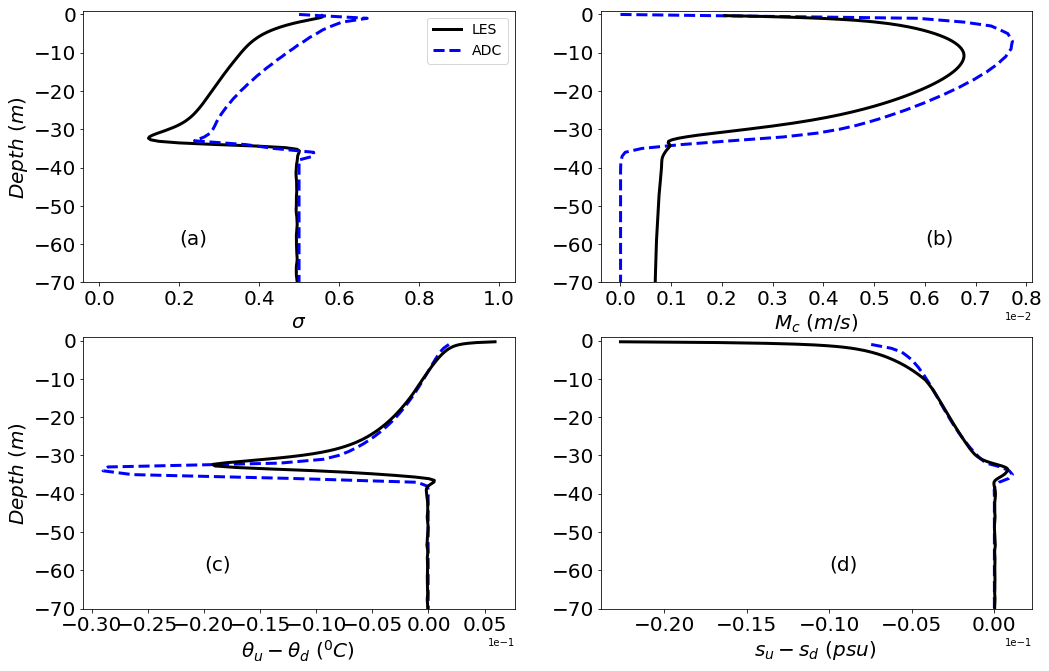

In [6]:
fig = plt.figure(figsize=(17,11))

d=70
lw=3
plt.subplot(221)
plt.plot(sigma_les,zm_les,'-k',linewidth=lw)

plt.plot(sigma_adc[:-1],zm_adc,'--b',linewidth=lw)
plt.ylim(-d,1)
plt.xlabel('$\sigma$ ', fontsize=20)
plt.ylabel('$Depth$ $(m)$ ', fontsize=20)
plt.text(0.2,-60, "(a)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(["LES","ADC"], fontsize=14)


plt.subplot(222)
plt.plot(mc_adc[:-1],zm_adc,'--b',linewidth=lw)
plt.plot(mc_les,zm_les,'-k',linewidth=lw)

plt.ylim(-d,1)
plt.text(0.006,-60, "(b)", fontsize=20)
plt.xlabel('$M_c$ $(m/s)$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(axis="x", style="sci", scilimits=(-2,-2))


plt.subplot(223)

plt.plot(tumd_adc[:-1]+tumd_adc_sps[:-1],zm_adc,'--b',linewidth=lw)
plt.plot(tumd_les,zm_les,'-k',linewidth=lw)
plt.ylim(-d,1)
plt.xlabel('$\\theta_u-\\theta_d$ $(^0C)$ ', fontsize=20)
plt.text(-0.02,-60, "(c)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('$Depth$ $(m)$ ', fontsize=20)
plt.ticklabel_format(axis="x", style="sci", scilimits=(-1,-1))


plt.subplot(224)
plt.plot(sumd_adc[:-1]+sumd_adc_sps[:-1],zm_adc,'--b',linewidth=lw)
plt.plot(sumd_les[:],zm_les[:],'-k',linewidth=lw)
plt.ylim(-d,1)
plt.xlabel('$s_u-s_d$ $(psu)$ ', fontsize=20)
plt.text(-0.01,-60, "(d)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(axis="x", style="sci", scilimits=(-1,-1))
#plt.xlim(-1.8e-3,0.3e-3)
plt.savefig("plume_les_adc.eps")

In [7]:
#### moments:
t=96

les= Dataset(path_les+"T1S15.nc", mode='r')

sigma, mc,wumd, tumd, sumd,sw,z=plume_les(les.variables['w3'][t,:], les.variables['w2'][t,:],les.variables['wt'][t,:],les.variables['ws'][t,:],les.variables['zm'][:])

u2=np.nanmean(les.variables['u2'][t1:t,:],axis=0)
v2=np.nanmean(les.variables['v2'][t1:t,:],axis=0)
w3=np.nanmean(les.variables['w3'][t1:t,:],axis=0)
w2=np.nanmean(les.variables['w2'][t1:t,:],axis=0)
wt=np.nanmean(les.variables['wt'][t1:t,:],axis=0)
ws=np.nanmean(les.variables['ws'][t1:t,:],axis=0)
zm=les.variables['zm'][:]
zt=les.variables['zt'][:]

w4=np.nanmean(les.variables['w4'][t1:t,:],axis=0)
temp=np.nanmean(les.variables['temp'][t1:t,:],axis=0)
salt=np.nanmean(les.variables['salt'][t1:t,:],axis=0)

w2t=np.nanmean(les.variables['w2t'][t1:t,:],axis=0)
w2s=np.nanmean(les.variables['w2s'][t1:t,:],axis=0)


w4_qna_les=3*w2**2

In [8]:
w2_mf=sigma*(1-sigma)*wumd**2
w3_mf=-sigma*(1-sigma)*(1-2*sigma)*wumd**3
wt_mf=sigma*(1-sigma)*wumd*tumd
ws_mf=sigma*(1-sigma)*wumd*sumd

w4_mf=sigma*(1-sigma)*(1-3*sigma+3*sigma**2)*wumd**4

w4_mf_qna=sigma*(1-sigma)*(1-sigma+sigma**2)*wumd**4



w2t_mf=sigma*(1-sigma)*(1-2*sigma)*wumd**2*tumd
w2s_mf=sigma*(1-sigma)*(1-2*sigma)*wumd**2*sumd

#w4_mf=3+(1-2*sigma)**2/(sigma*(1-sigma))*w2_mf**2
#w4_mf2=1.5*w2_mf**2
#w4_qna_mf=(3+sw_adc**2)*w2_mf**2
#w2t_mf=
#w2s_mf=

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


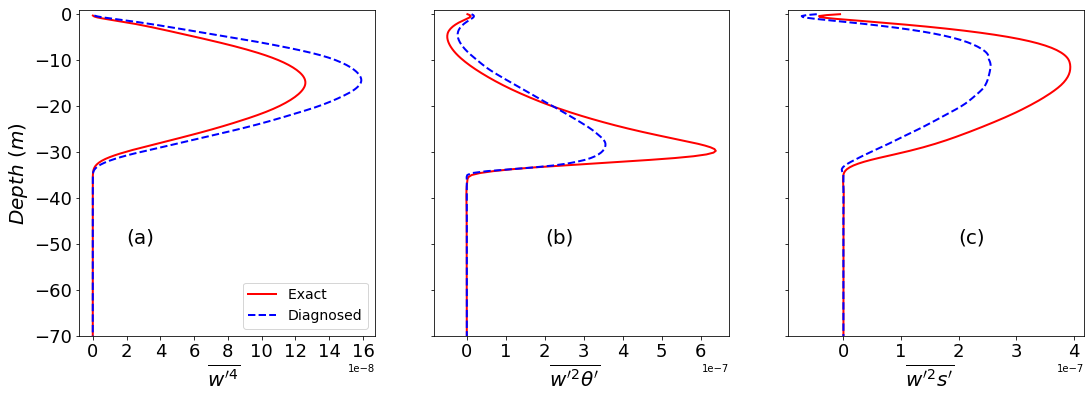

In [9]:

fig = plt.figure(figsize=(18,6))

plt.subplot(131)
plt.plot(w4[:-1],zm_les,'-r',linewidth=2)
plt.plot(w4_mf_qna[:],z,'--b',linewidth=2)
#plt.plot(3*w2_mf**2,z,':b',linewidth=2)



plt.ylim(-d,1)
plt.xlabel('$\overline{{w^\prime}^4}$  ', fontsize=20)
plt.ylabel('$Depth$ $(m)$ ', fontsize=20)
#plt.text(0.0002,-50, "(a)", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(["Exact ","Diagnosed","QNA_Exact","QNA_assumed PDF"], fontsize=14,loc=4)
plt.ticklabel_format(axis="x", style="sci", scilimits=(-8,-8))

plt.text(2e-8,-50, "(a)", fontsize=20)


plt.subplot(132)
plt.plot(w2t[:],zt,'r',linewidth=2)
plt.plot(-w2t_mf[:],zt[:-1],'--b',linewidth=2)


plt.ylim(-d,1)
plt.xlabel('$\overline{{w^\prime}^2\\theta^\prime}$   ', fontsize=20)
#plt.ylabel('$Depth$ $(m)$ ', fontsize=20)
#plt.text(0.0002,-50, "(a)", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
#plt.legend(["w2t_les(output)","w2t_pdf"], fontsize=14,loc=4)
plt.ticklabel_format(axis="x", style="sci", scilimits=(-7,-7))
#plt.legend(["Exact","assumed PDF"], fontsize=14,loc=4)
plt.yticks(color='w')
plt.text(2e-7,-50, "(b)", fontsize=20)



plt.subplot(133)
plt.plot(w2s[:],zt,'r',linewidth=2)
plt.plot(-w2s_mf[:],zt[:-1],'--b',linewidth=2)


plt.ylim(-d,1)
plt.xlabel('$\overline{{w^\prime}^2s^\prime}$   ', fontsize=20)
#plt.ylabel('$Depth$ $(m)$ ', fontsize=20)
#plt.text(0.0002,-50, "(a)", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
#plt.legend(["w2s_les(output)","w2s_pdf"], fontsize=14,loc=4)
plt.ticklabel_format(axis="x", style="sci", scilimits=(-7,-7))
plt.yticks(color='w')
plt.text(2e-7,-50, "(c)", fontsize=20)

plt.savefig("exact_pdf_2.eps")

In [20]:
####################################################################